In [371]:
import random
import math
import cv2
import numpy as np
from PIL import Image
from  matplotlib import pyplot as plt

In [372]:

f = r'./tt.jpg'
im=plt.imread(f)
im2 = plt.imread('./tmp/t1.jpg')
# plt.imshow(im)

Text(0.5, 1.0, 'all')

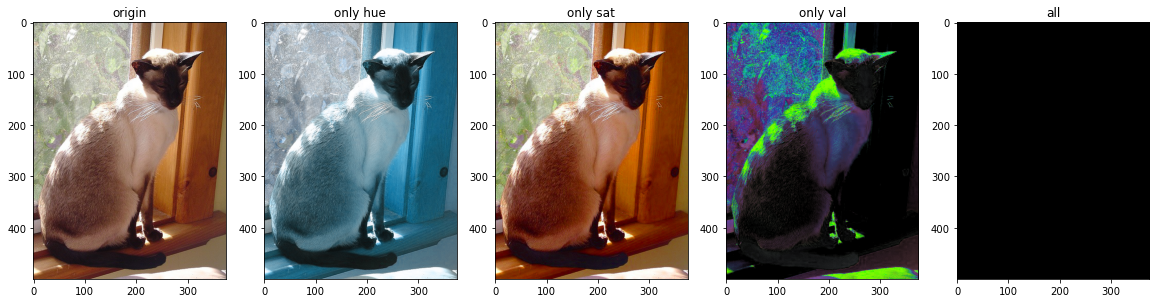

In [373]:
hgain=0.5
sgain=0.5
vgain=0.9
r = np.random.uniform(-2, 2, 3) * [hgain, sgain, vgain] + 1


hue, sat, val = cv2.split(cv2.cvtColor(im, cv2.COLOR_BGR2HSV))
dtype = im.dtype  # uint8
x = np.arange(0, 256, dtype=r.dtype)

plt.figure(figsize=(20, 100)) 
plt.subplot(1,5,1)
plt.imshow(im)
plt.title("origin")

# 调整色调
lut_hue = ((x * r[0]) % 180).astype(dtype)

hue_image = cv2.merge(
    (cv2.LUT(hue, lut_hue), 
     cv2.LUT(sat,  np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(val,  np.clip(x, 0, 255).astype(dtype))))
hue_image = cv2.cvtColor(hue_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,2)
plt.imshow(hue_image)
plt.title("only hue")

# 调整饱和度
lut_sat = np.clip(x * r[1], 0, 255).astype(dtype)

sat_image = cv2.merge(
    (cv2.LUT(hue, np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(sat, lut_sat), 
     cv2.LUT(val, np.clip(x, 0, 255).astype(dtype))))
sat_image = cv2.cvtColor(sat_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,3)
plt.imshow(sat_image)
plt.title("only sat")

# 曝光调整
lut_val = np.clip(x * r[2], 0, 255).astype(dtype)

val_image = cv2.merge(
    (cv2.LUT(hue, np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(sat, np.clip(x, 0, 255).astype(dtype)), 
     cv2.LUT(val, lut_val)))
sat_image = cv2.cvtColor(sat_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,4)
plt.imshow(sat_image)
plt.title("only val")
# 综合调整
hsv_image = cv2.merge((cv2.LUT(hue, lut_hue), cv2.LUT(sat, lut_sat), cv2.LUT(val, lut_val)))
hsv_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
plt.subplot(1,5,5)
plt.imshow(hsv_image)
plt.title("all")

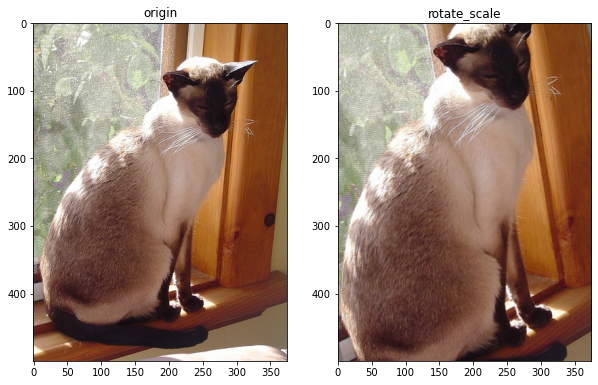

In [374]:
degree = 45
scale = 0.5
h,w = im.shape[:2]

RS = np.eye(3)
angle = np.random.uniform(-degree,degree)#随机角度
random_scale = np.random.uniform(1-scale,1+scale)#随机尺度
RS[:2]=cv2.getRotationMatrix2D(angle=angle,center=(w//2,h//2),scale=random_scale)#如果angle为0则只会随机大小
# 将变换矩阵应用到图片里
rotate_scale = cv2.warpPerspective(im,RS,dsize=(w,h),borderValue=(114,114,114))
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(im)
plt.title("origin")

plt.subplot(122)
plt.imshow(rotate_scale)
plt.title("rotate_scale")
plt.show()

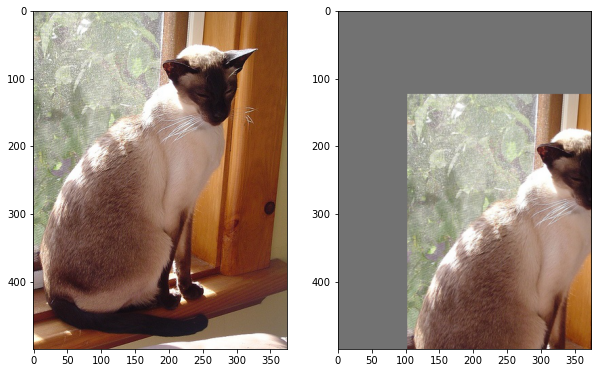

In [375]:
t = 0.1
h,w = im.shape[:2]

T = np.eye(3)
T[0,2] = np.random.uniform(0.5-t,0.5+t)*w*0.5
T[1,2] = np.random.uniform(0.5-t,0.5+t)*h*0.5
translate = cv2.warpPerspective(im,T,dsize=(w,h),borderValue=(114,114,114))

plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
plt.imshow(translate)
plt.show()

Text(0.5, 1.0, 'shear')

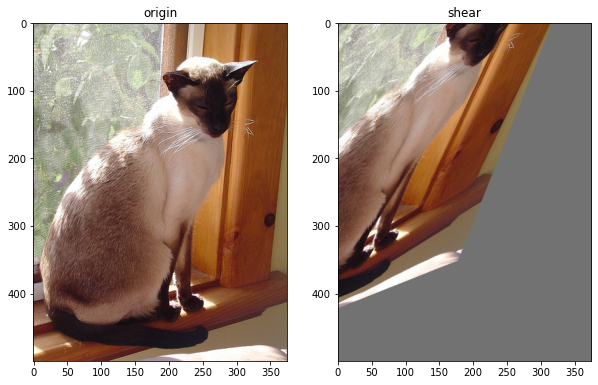

In [376]:
degree = 45
h,w,_ = im.shape
S = np.eye(3)
# 错切和旋转都是通过[0,1],[1,0]两个参数控制, 不同的是旋转两个参数互为相反数, 错切则不然
S[0, 1] = math.tan(random.uniform(-degree, degree) * math.pi / 180)
S[1, 0] = math.tan(random.uniform(-degree, degree) * math.pi / 180)

shear = cv2.warpPerspective(im, S, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(shear)
plt.title("shear")

Text(0.5, 1.0, 'perspective')

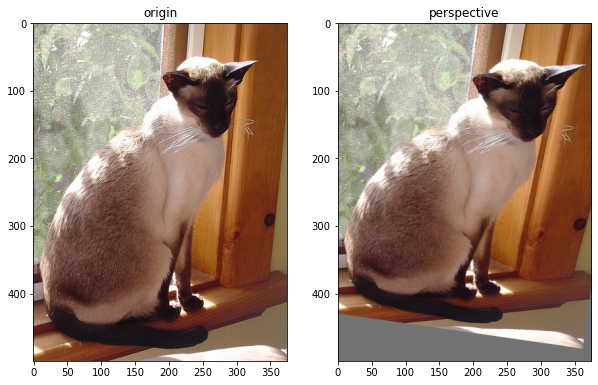

In [377]:
p = 0.001
h, w, c = im.shape
im_copy = im.copy()
P = np.eye(3)
P[2, 0] = random.uniform(-p, p)
P[2, 1] = random.uniform(-p, p)
perspective = cv2.warpPerspective(im_copy, P, dsize=(w, h), borderValue=(114, 114, 114))

plt.figure(figsize=(10, 20)) 
plt.subplot(1,2,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,2,2)
plt.imshow(perspective)
plt.title("perspective")

Text(0.5, 1.0, 'right')

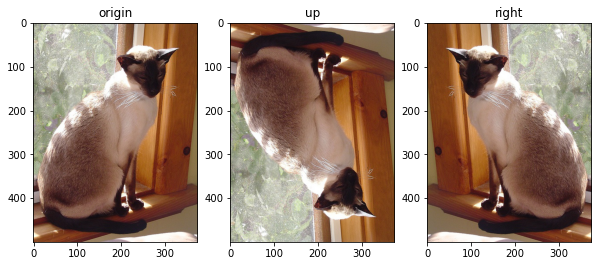

In [378]:
im_up = np.flipud(im)
im_right = np.fliplr(im)

plt.figure(figsize=(10, 30)) 
plt.subplot(1,3,1)
plt.imshow(im)
plt.title("origin")

plt.subplot(1,3,2)
plt.imshow(im_up)
plt.title("up")

plt.subplot(1,3,3)
plt.imshow(im_right)
plt.title("right")

Text(0.5, 1.0, 'mosaic')

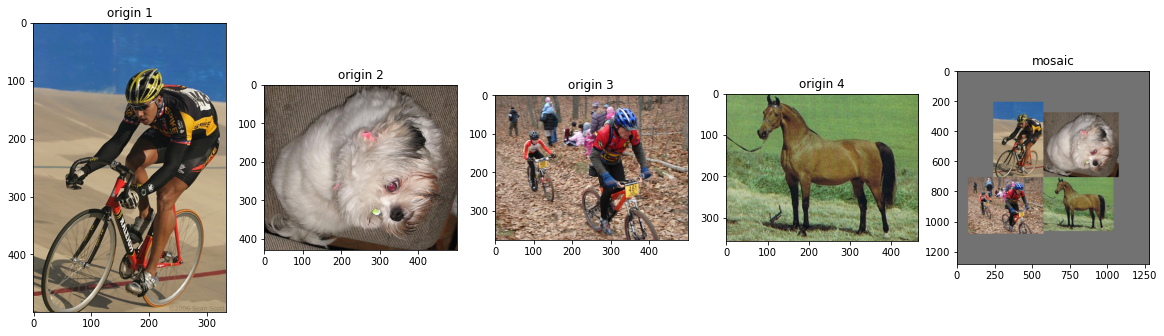

In [379]:
im_size=640
mosaic_border = [-im_size // 2, -im_size // 2]
labels4, segments4 = [], []
s = im_size
# 这里随机计算一个xy中心点
yc, xc = (int(random.uniform(-x, 2 * s + x)) for x in mosaic_border)  # mosaic center x, y
# indices = [index] + random.choices(self.indices, k=3)  # 3 additional image indices
# random.shuffle(indices)
im_files = [
    './tmp/t1.jpg',
    './tmp/t2.jpg',
    './tmp/t3.jpg',
    './tmp/t4.jpg',
]

img4 = np.full((s * 2, s * 2, 3), 114, dtype=np.uint8)
for i, file in enumerate(im_files):
    # Load image
    # img, _, (h, w) = load_image(self, index)
    img = cv2.imread(file)
    h, w, _ = np.shape(img)

    # place img in img4
    if i == 0:  # top left
        # base image with 4 tiles
        # 这里计算第一张图贴到左上角部分的一个 起点xy, 终点xy就是xc,yc
        x1a, y1a, x2a, y2a = max(xc - w, 0), max(yc - h, 0), xc, yc  # xmin, ymin, xmax, ymax (large image)
        # 计算主要是裁剪出要贴的图，避免越界了, 其实起点一般就是(0,0),如果上面xc<w,yc<h,这里就会被裁剪掉部分, 终点就是w,h
        x1b, y1b, x2b, y2b = w - (x2a - x1a), h - (y2a - y1a), w, h  # xmin, ymin, xmax, ymax (small image)
    elif i == 1:  # top right
        x1a, y1a, x2a, y2a = xc, max(yc - h, 0), min(xc + w, s * 2), yc
        x1b, y1b, x2b, y2b = 0, h - (y2a - y1a), min(w, x2a - x1a), h
    elif i == 2:  # bottom left
        x1a, y1a, x2a, y2a = max(xc - w, 0), yc, xc, min(s * 2, yc + h)
        x1b, y1b, x2b, y2b = w - (x2a - x1a), 0, w, min(y2a - y1a, h)
    elif i == 3:  # bottom right
        x1a, y1a, x2a, y2a = xc, yc, min(xc + w, s * 2), min(s * 2, yc + h)
        x1b, y1b, x2b, y2b = 0, 0, min(w, x2a - x1a), min(y2a - y1a, h)

    img4[y1a:y2a, x1a:x2a] = img[y1b:y2b, x1b:x2b]
    
    
plt.figure(figsize=(20, 100)) 
plt.subplot(1,5,1)
plt.imshow(plt.imread(im_files[0]))
plt.title("origin 1")

plt.subplot(1,5,2)
plt.imshow(plt.imread(im_files[1]))
plt.title("origin 2")

plt.subplot(1,5,3)
plt.imshow(plt.imread(im_files[2]))
plt.title("origin 3")

plt.subplot(1,5,4)
plt.imshow(plt.imread(im_files[3]))
plt.title("origin 4")

plt.subplot(1,5,5)
plt.imshow(img4[:,:,::-1])
plt.title("mosaic")

Text(0.5, 1.0, 'mix_up')

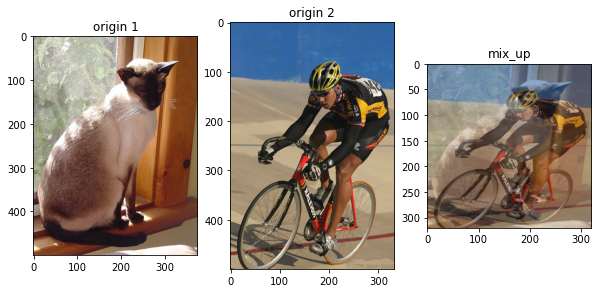

In [380]:
im_resize = cv2.resize(im,(320,320))
im2_resize = cv2.resize(im2,(320,320))
r = np.random.beta(32.0, 32.0)  # mixup ratio, alpha=beta=32.0
mix_up = (im_resize * r + im2_resize * (1 - r)).astype(np.uint8)

plt.figure(figsize=(10, 30)) 
plt.subplot(1,3,1)
plt.imshow(im)
plt.title("origin 1")

plt.subplot(1,3,2)
plt.imshow(im2)
plt.title("origin 2")

plt.subplot(1,3,3)
plt.imshow(mix_up)
plt.title("mix_up")